In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [67]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")
df = pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14704\2604066406.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")


Data has been successfully imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [69]:
df.shape

(181691, 135)

In [70]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [71]:
for i in df.columns:
    print(i, end=", ")


eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [72]:
df = df[["iyear", "country_txt", "attacktype1_txt", "weaptype1_txt", "nkill", "nwound"]]
df.head()


,iyear,country_txt,attacktype1_txt,weaptype1_txt,nkill,nwound
0,1970,Dominican Republic,Assassination,Unknown,1.0,0.0
1,1970,Mexico,Hostage Taking (Kidnapping),Unknown,0.0,0.0
2,1970,Philippines,Assassination,Unknown,1.0,0.0
3,1970,Greece,Bombing/Explosion,Explosives,NaN,NaN
4,1970,Japan,Facility/Infrastructure Attack,Incendiary,NaN,NaN


In [73]:
df.rename(columns={"iyear": "Year", "country_txt": "Country",
                   "attacktype1_txt": "Attack Type", "weaptype1_txt": "Weapon Type",
                   "nkill": "Killed", "nwound": "Wounded"}, inplace=True)


In [74]:
df.head()

,Year,Country,Attack Type,Weapon Type,Killed,Wounded
0,1970,Dominican Republic,Assassination,Unknown,1.0,0.0
1,1970,Mexico,Hostage Taking (Kidnapping),Unknown,0.0,0.0
2,1970,Philippines,Assassination,Unknown,1.0,0.0
3,1970,Greece,Bombing/Explosion,Explosives,NaN,NaN
4,1970,Japan,Facility/Infrastructure Attack,Incendiary,NaN,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Country      181691 non-null  object 
 2   Attack Type  181691 non-null  object 
 3   Weapon Type  181691 non-null  object 
 4   Killed       171378 non-null  float64
 5   Wounded      165380 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.3+ MB


In [76]:
df.shape


(181691, 6)

In [77]:

df.isnull().sum()


Year               0
Country            0
Attack Type        0
Weapon Type        0
Killed         10313
Wounded        16311
dtype: int64

In [78]:
df["Killed"] = df["Killed"].fillna(0)
df["Wounded"] = df["Wounded"].fillna(0)
df["Casualty"] = df["Killed"] + df["Wounded"]

df.describe()

,Year,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,2.266860,2.883296,5.150156
std,13.259430,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,0.000000
25%,1991.000000,0.000000,0.000000,0.000000
50%,2009.000000,0.000000,0.000000,1.000000
75%,2014.000000,2.000000,2.000000,4.000000
max,2017.000000,1570.000000,8191.000000,9574.000000


In [79]:
attacks = df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index": "Year", "Year": "Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


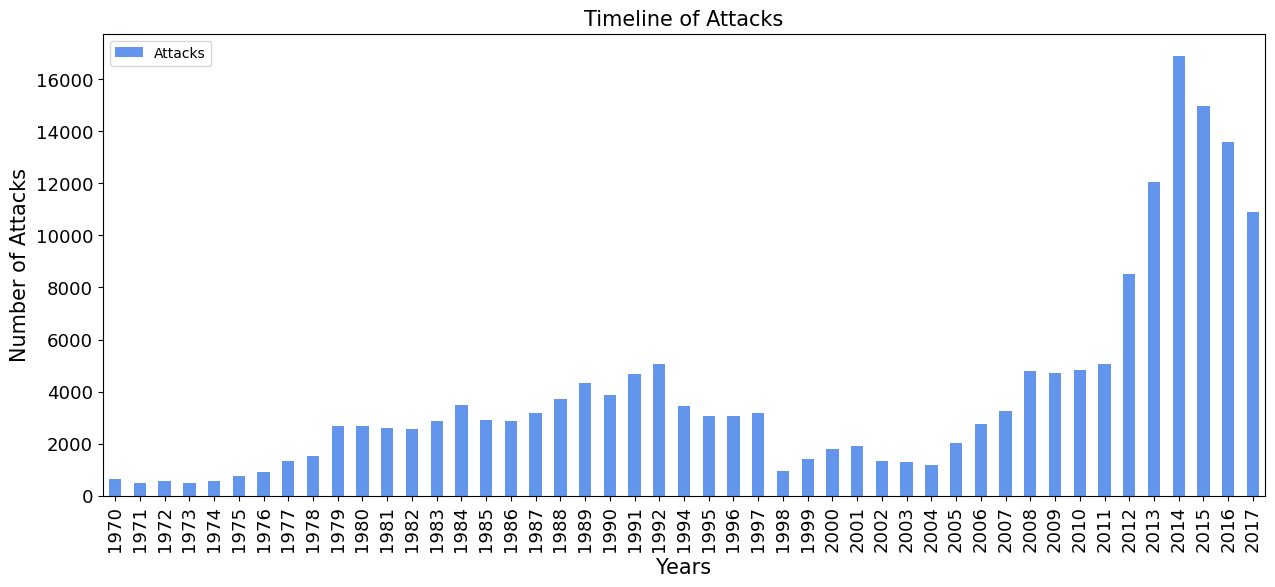

In [80]:
attacks.plot(kind="bar", color="cornflowerblue", figsize=(15, 6), fontsize=13)
plt.title("Timeline of Attacks", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)
plt.show()

In [81]:
yc = df[["Year", "Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


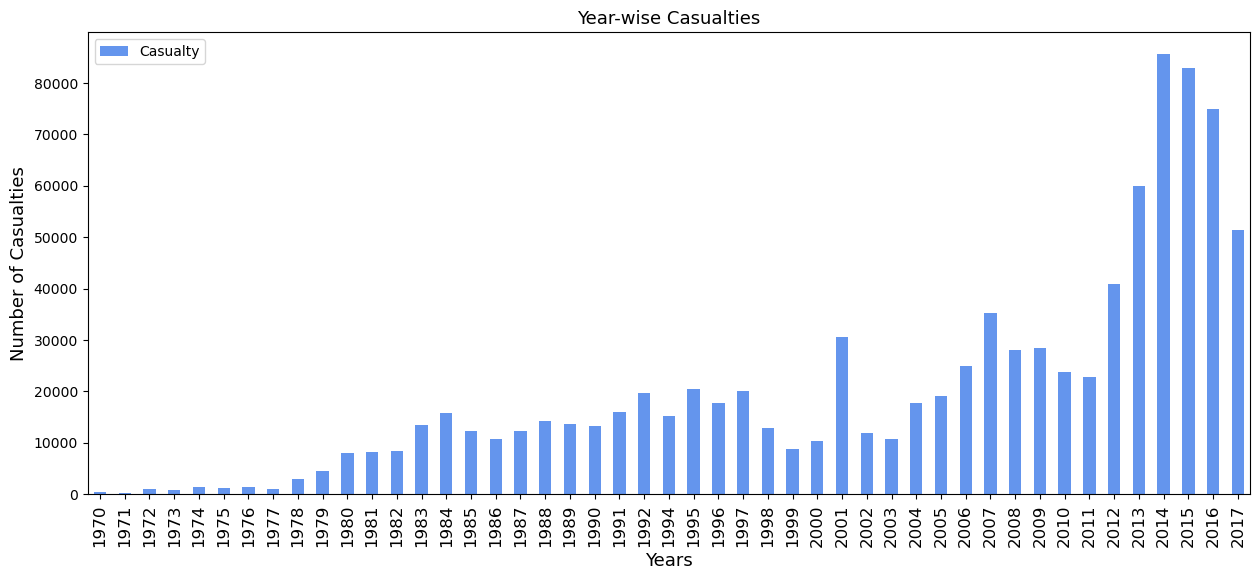

In [82]:
yc.plot(kind="bar", color="cornflowerblue", figsize=(15, 6))
plt.title("Year-wise Casualties", fontsize=13)
plt.xlabel("Years", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties", fontsize=13)
plt.show()

In [83]:
yk = df[["Year", "Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [84]:
yw = df[["Year", "Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


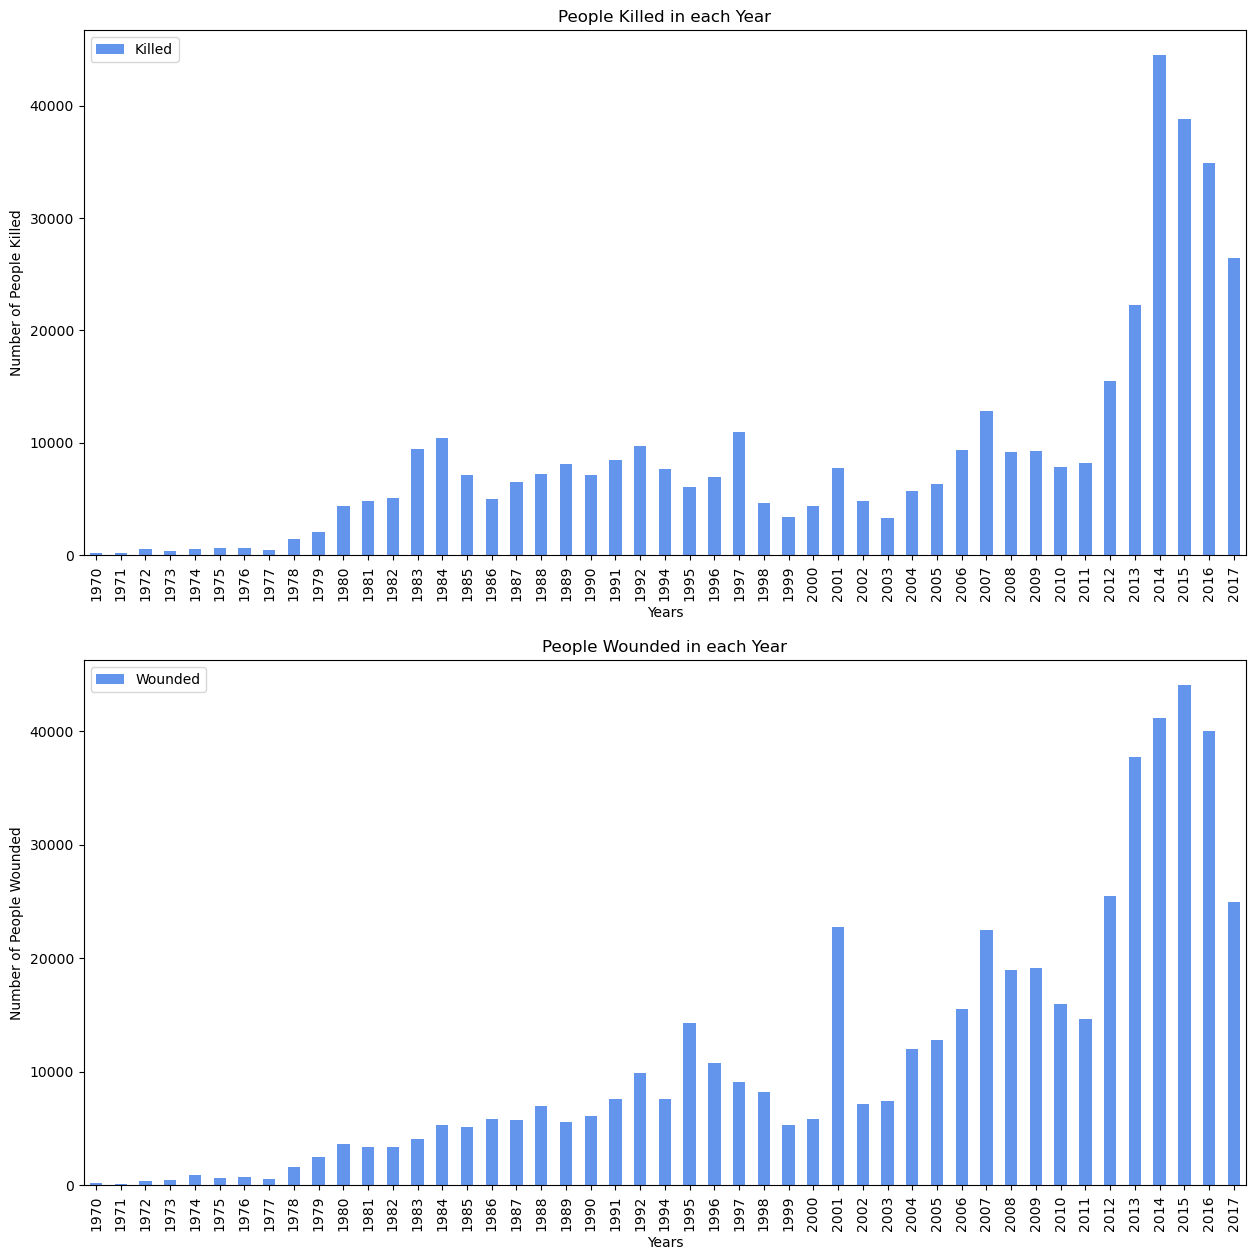

In [85]:
fig = plt.figure()
ax0 = fig.add_subplot(2, 1, 1)
ax1 = fig.add_subplot(2, 1, 2)

# Killed
yk.plot(kind="bar", color="cornflowerblue", figsize=(15, 15), ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

# Wounded
yw.plot(kind="bar", color="cornflowerblue", figsize=(15, 15), ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")
df = pd.DataFrame(data)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14704\296372944.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")


In [88]:
print("Data has been successfully imported")

Data has been successfully imported


In [89]:
df = df[["iyear", "country_txt", "attacktype1_txt", "weaptype1_txt", "nkill", "nwound", "region_txt"]]


In [90]:
df.rename(columns={"iyear": "Year", "country_txt": "Country",
                   "attacktype1_txt": "Attack Type", "weaptype1_txt": "Weapon Type",
                   "nkill": "Killed", "nwound": "Wounded"}, inplace=True)

# Fill missing values

In [91]:
    df["Killed"] = df["Killed"].fillna(0)
df["Wounded"] = df["Wounded"].fillna(0)


In [92]:
reg = pd.crosstab(df.Year, df.region_txt)
reg.head()

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


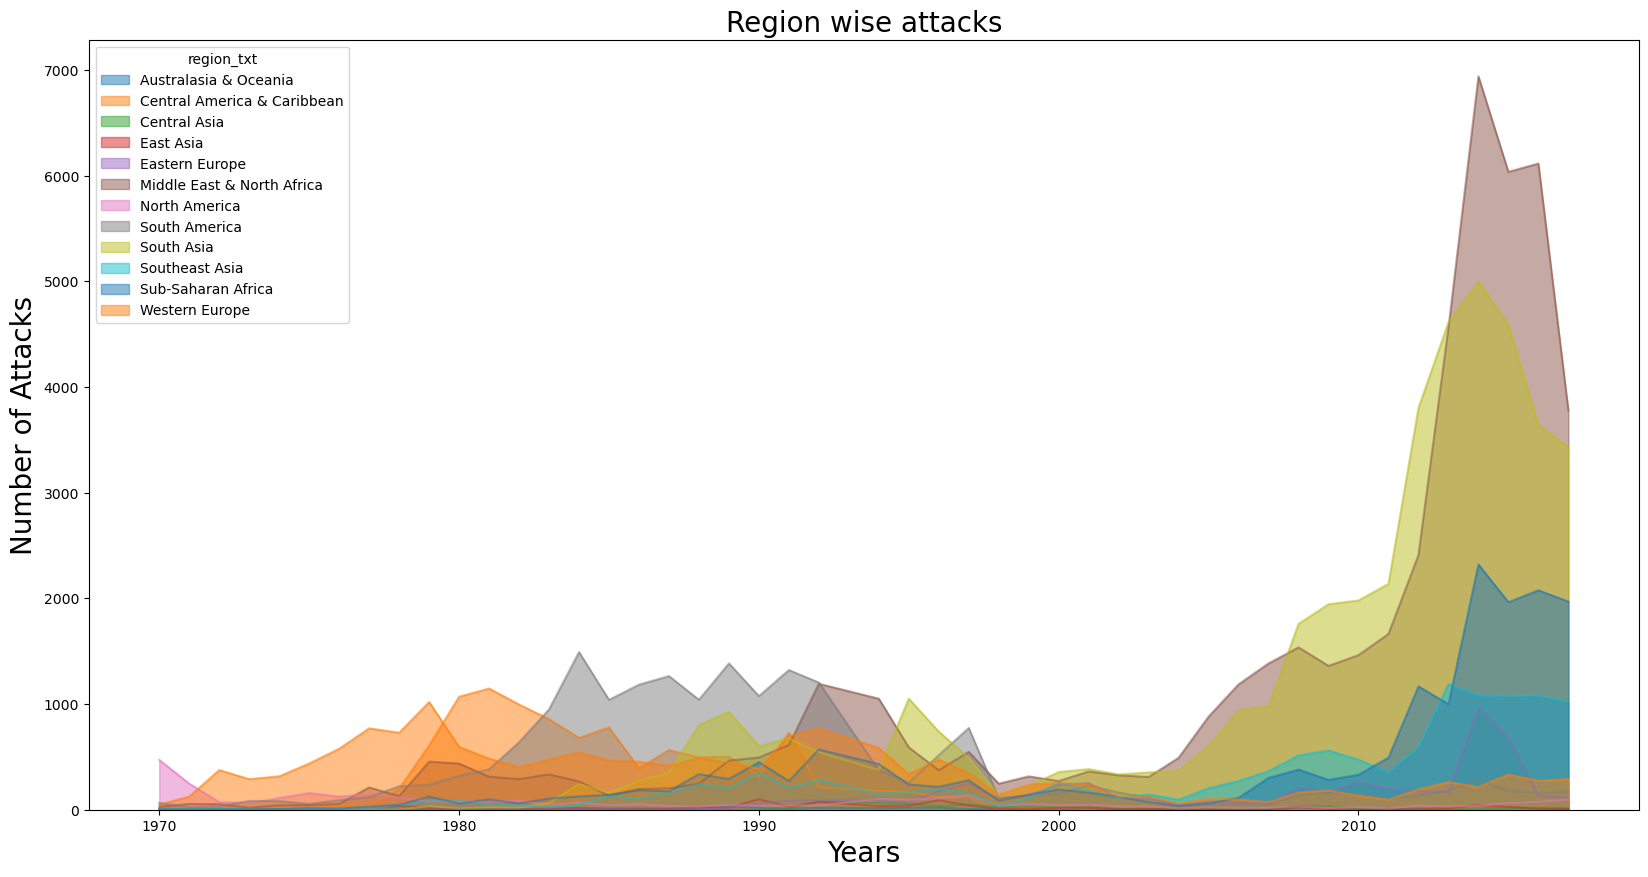

In [93]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [94]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

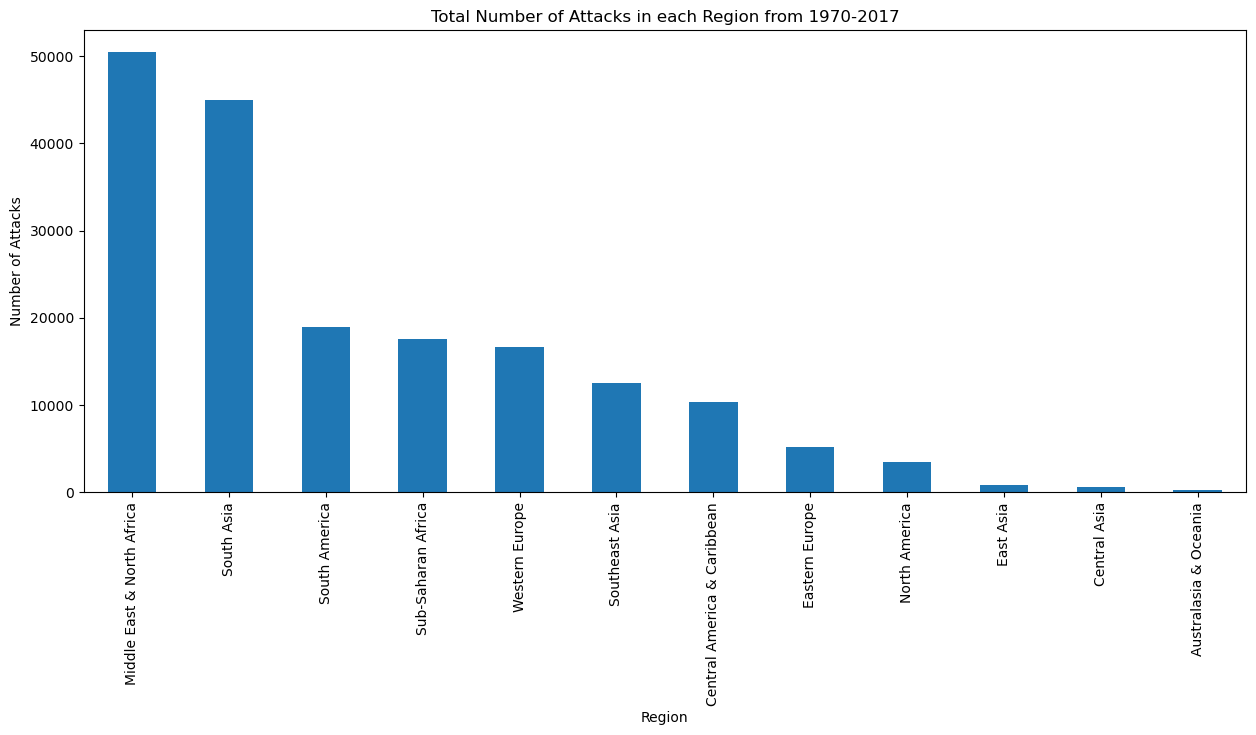

In [95]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

In [96]:
rw = df[["region_txt", "Wounded"]].groupby("region_txt").sum().sort_values(by="Wounded", ascending=False)


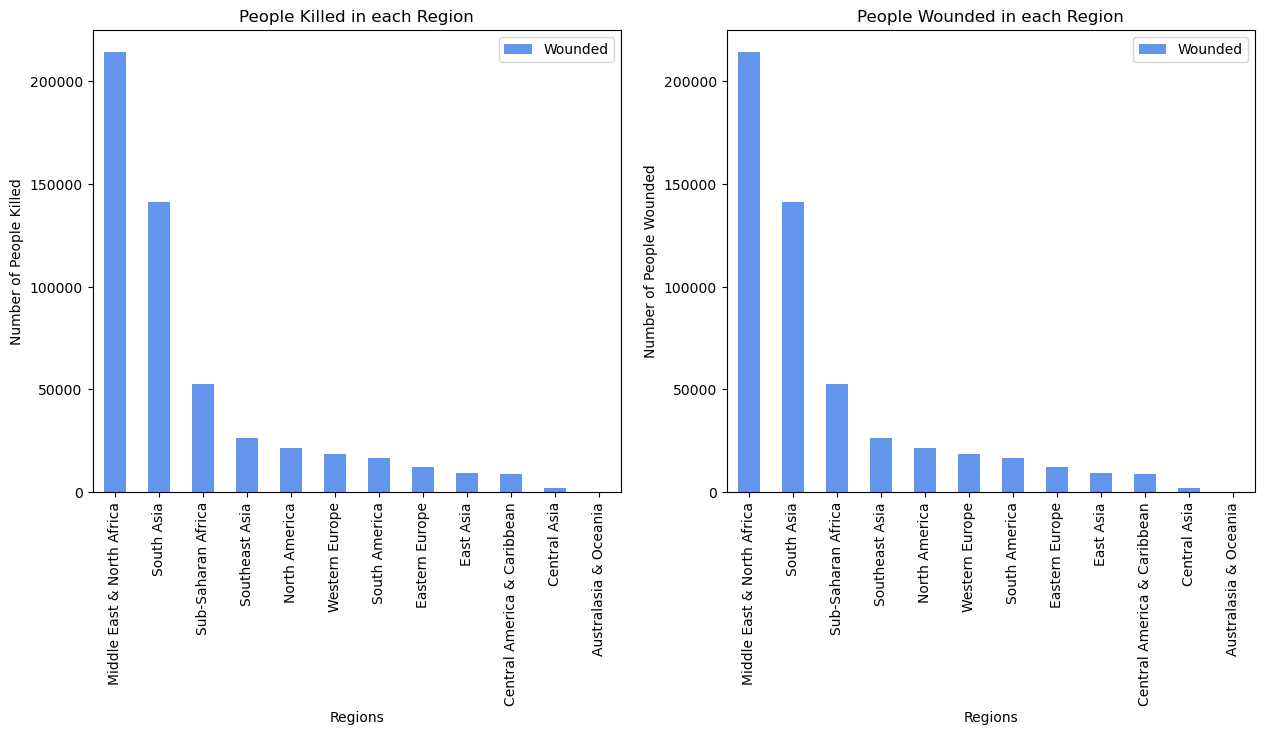

In [97]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 6))

# Killed
rw.plot(kind="bar", color="cornflowerblue", ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

# Wounded
rw.plot(kind="bar", color="cornflowerblue", ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()
